In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score


In [3]:
df=pd.read_csv("./datasets/weight_height_dataset.csv")
df

,Height(cm),Weight(kg),Class
0,171.408421,69.037935,Normal
1,153.935688,47.797508,Underweight
2,176.573961,78.871438,Overweight
3,170.663093,70.263714,Normal
4,164.009912,68.730922,Normal
...,...,...,...
145,181.933161,85.660306,Overweight
146,166.007758,73.997699,Normal
147,158.383396,55.464065,Underweight
148,174.596901,86.130276,Overweight


Class
Normal         50
Underweight    50
Overweight     50
Name: count, dtype: int64


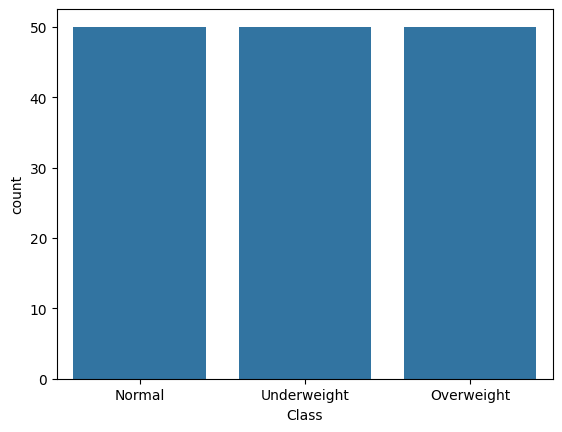

In [5]:
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.show()


In [7]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train: (112, 2)
X_test: (38, 2)
y_train (112,)
y_test (38,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_trainn=sc.fit_transform(X_train)
X_testt=sc.transform(X_test)

## 📏 Minkowski Distance Formula

The **Minkowski Distance** is a distance metric used to measure the distance between two points in an \( n \)-dimensional space.  
The formula for **Minkowski Distance** is given by:  

$$
D(A, B) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

where:  
- \( D(A, B) \) → Distance between two points \( A \) and \( B \)  
- \( n \) → Number of dimensions (features)  
- \( p \) → Minkowski power parameter  
- \( |x_i - y_i| \) → Absolute difference between the \( i \)-th feature of \( A \) and \( B \)  

---

## 💡 Different Values of \( p \)
The value of \( p \) in the Minkowski Distance determines the type of distance:

### 1. **Manhattan Distance (L1 Norm)**
If \( p = 1 \), the formula becomes:  

$$
D(A, B) = \sum_{i=1}^{n} |x_i - y_i|
$$

👉 This is known as **Manhattan Distance (L1 Norm)**.  
👉 It is used in **city-block distance (like taxi movement)**.

---

### 2. **Euclidean Distance (L2 Norm)**
If \( p = 2 \), the formula becomes:  

$$
D(A, B) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

👉 This is the most common distance used in **KNN algorithms**.

---

## ✅ Usage of Minkowski Distance in KNN
In **K-Nearest Neighbors (KNN)**, the Minkowski Distance is used with different values of \( p \):


In [21]:
from sklearn.neighbors import KNeighborsClassifier
#KNeighborsClassifier?
#metric- often we use euclidean distance, but there are many such as mahattan distance,cosine,jaccard etc.
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_trainn, y_train)

KNeighborsClassifier()

In [33]:
print(classifier.predict(sc.transform([[174,87]])))

['Overweight']


In [25]:
y_pred = classifier.predict(X_testt)
y_pred

array(['Normal', 'Underweight', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Overweight', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Overweight', 'Underweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Underweight', 'Overweight',
       'Overweight', 'Overweight', 'Underweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Underweight'], dtype=object)

In [35]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[16,  1,  0],
       [ 2, 10,  0],
       [ 0,  0,  9]], dtype=int64)

In [37]:
labels=classifier.classes_
labels

array(['Normal', 'Overweight', 'Underweight'], dtype=object)

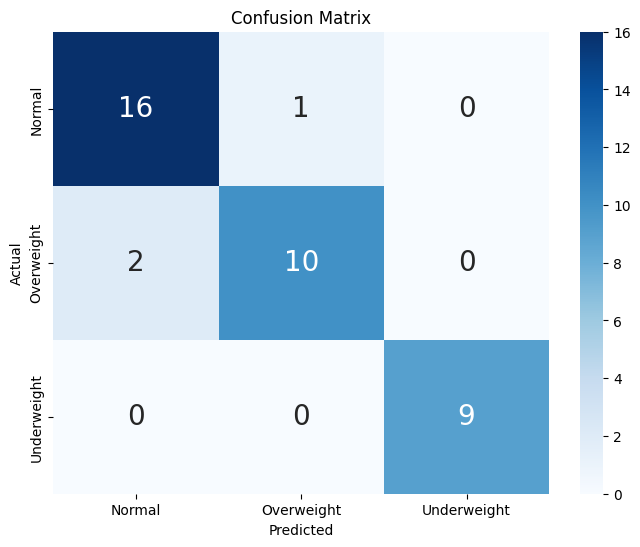

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axis together
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the heatmap on the same ax
sns.heatmap(cf, annot=True, annot_kws={"size": 20}, fmt='d',
            cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax)

# Set labels and title
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Show the plot

plt.show()


In [47]:
from sklearn.metrics import classification_report,roc_curve,auc
print(classification_report(y_test,y_pred,target_names=labels))


              precision    recall  f1-score   support

      Normal       0.89      0.94      0.91        17
  Overweight       0.91      0.83      0.87        12
 Underweight       1.00      1.00      1.00         9

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.93        38
weighted avg       0.92      0.92      0.92        38



**In classification report**
- support refers to the number of actual samples in the test set that belong to a given class.
- macro avg:macro averaging treats all classes equally
- macroavg for precision=(normal precision+overweight precision+ underweight precision)/3
- same for recall and f1-score
- **Weighted averaging** accounts for the number of instances (support) of each class when calculating precision, recall, and F1-score. 
- It gives more importance to classes with more samples in the dataset.


### 🔹 Weighted Precision Calculation

The weighted precision is calculated as:

$$
\text{Weighted Precision} = \frac{(P_1 \times S_1) + (P_2 \times S_2) + (P_3 \times S_3)}{S_1 + S_2 + S_3}
$$

Where:
- \( P_1, P_2, P_3 \) are the precision values for each class.
- \( S_1, S_2, S_3 \) are the number of instances (**support**) for each class.

#### **Substituting Values:**
$$
\text{Weighted Precision} = \frac{(0.89 \times 17) + (0.91 \times 12) + (1.00 \times 9)}{17 + 12 + 9}
$$

$$
= \frac{(15.13) + (10.92) + (9.00)}{38}
$$

$$
= \frac{35.05}{38} = 0.92
$$

✅ **Final Weighted Precision = 0.92**


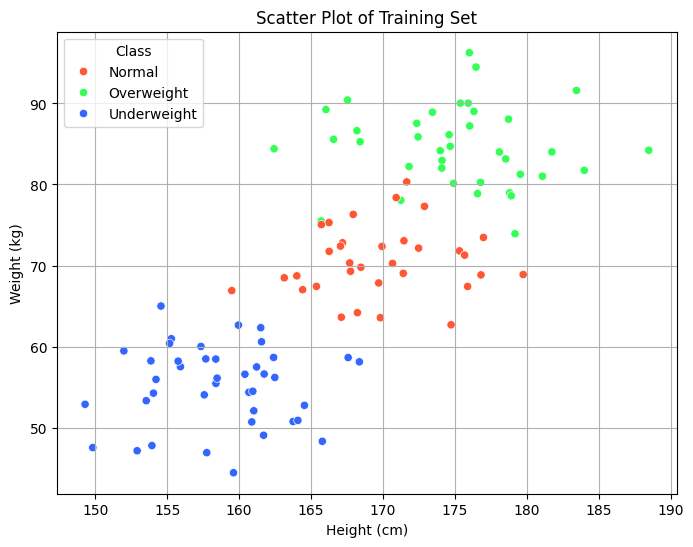

In [49]:
#  X_train is your feature matrix and y_train is target vector
# X_train has two features for simplicity
# Convert X_train to a pandas DataFrame for easier visualization with Seaborn
df = pd.DataFrame(X_train, columns=['Height(cm)','Weight(kg)'])
custom_palette = ['#FF5733', '#33FF57', '#3366FF']
#  y_train is  target vector
# Concatenate X_train DataFrame with y_train Series
df['Class'] = y_train
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height(cm)', y='Weight(kg)', hue='Class', palette=custom_palette)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot of Training Set')
plt.legend(title='Class')
plt.grid(True)
plt.show()


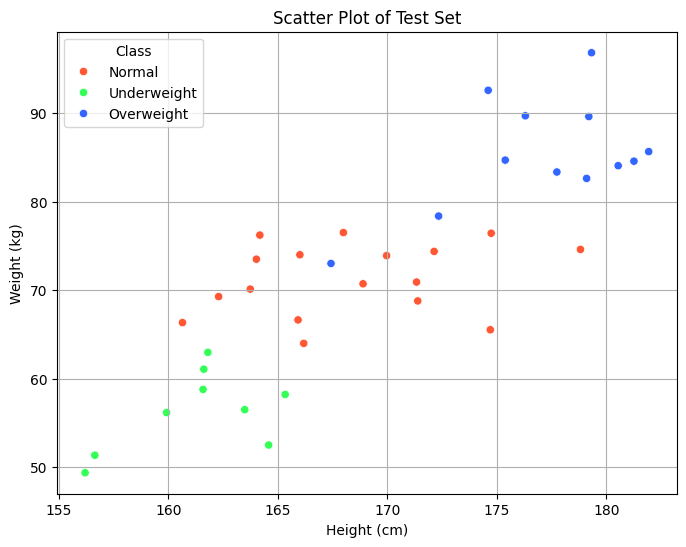

In [25]:
#  X_test is your feature matrix and y_test is  target vector
#  X_test has two features for simplicity
# Convert X_test to a pandas DataFrame for easier visualization with Seaborn
df = pd.DataFrame(X_test, columns=['Height(cm)','Weight(kg)'])
custom_palette = ['#FF5733', '#33FF57', '#3366FF']
#  y_test is your target vector
# Concatenate X_test DataFrame with y_train Series
df['Class'] = y_test
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height(cm)', y='Weight(kg)', hue='Class', palette=custom_palette)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot of Test Set')
plt.legend(title='Class')
plt.grid(True)
plt.show()

In [26]:
#print("Original Labels",X_test)
#print("Labels Predicted",prediction)

print("Train data accuracy:",accuracy_score(y_true =y_train, y_pred=classifier.predict(X_trainn)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=classifier.predict(X_testt)))

Train data accuracy: 0.9553571428571429
Test data accuracy: 0.9210526315789473


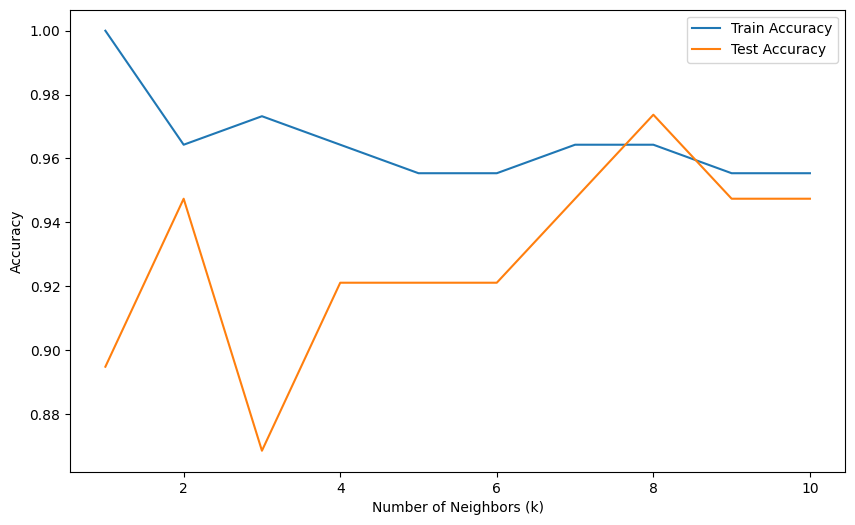

In [51]:
neighbors=np.arange(1,11)
train_accuracies = []
test_accuracies = []
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trainn,y_train)
    train_accuracy=knn.score(X_trainn,y_train)
    test_accuracy=knn.score(X_testt,y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='Train Accuracy')
plt.plot(neighbors, test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()